# Beer Style Prediction

There is limitless world of beer 


### What We're Using

* ABV - Alchol by Volume, measures the the percentage of alcohol in         beer.
* IBU - International Bitterness Units, measures hop bitterness             scale starting with 0, with no cap.
          
* SRM - Standard Reference Method, a scale that classifies beers by color from pale straw to black



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

In [2]:
#import the data
df = pd.read_csv('/Users/natashabedford/GA_Project/CB_Data/recipeData.csv')

#display first 10 observations
df.head(5)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [3]:
#get rid of space, and make '_', and lower case all of the column names
df.columns= [i.replace(' ', '_').lower() for i in df.columns]

In [4]:
#rename for preference
df=df.rename(columns={'styleid':'style_id','boilsize':'boil_size',
                   'boiltime':'boil_time', 'boilgravity':'boil_gravity',
                   'mashthickness':'mash_thickness','sugarscale':'sugar_scale',
                   'brewmethod':'brew_method','primarytemp':'primary_temp'})

In [5]:
df.shape

(73861, 23)

In [6]:
#create a function to summarize the data

def data_brief(df):
    #new df for a list of columns
    columns= pd.DataFrame(df.columns, columns=['Columns'])
    count_rows=df.shape[0] #the rows
    count_columns=len(df.columns)#the columns
    index= df.index.name #the index
    
    print(f'\nRows:', count_rows)
    print(f'\nIndex:', index)
    print(f'\nColumns:', count_columns )
    
    return(columns)

data_brief(df)


Rows: 73861

Index: None

Columns: 23


,Columns
0,beerid
1,name
2,url
3,style
4,style_id
5,size(l)
6,og
7,fg
8,abv
9,ibu


In [7]:
#created a function for information on the df 
## show information before cleaning

def beer_details(df):
    eda_df = {} #created a new open dataframe to add below into
    eda_df['null_sum'] = df.isnull().sum() 
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    eda_df['var'] = df.var()
    
    return pd.DataFrame(eda_df) #return that new dataframe

beer_details(df)

,null_sum,null_pct,dtypes,count,mean,median,min,max,var
abv,0,0.000000,float64,73861,6.136865,5.790,0,54.72,3.547610e+00
beerid,0,0.000000,int64,73861,36931.000000,36931.000,1,73861,4.546268e+08
boil_gravity,2990,0.040481,float64,70871,1.353955,1.047,0,52.6,3.728717e+00
boil_size,0,0.000000,float64,73861,49.724919,27.440,1,9700,3.734418e+04
boil_time,0,0.000000,int64,73861,65.074870,60.000,0,240,2.257274e+02
brew_method,0,0.000000,object,73861,NaN,NaN,All Grain,extract,NaN
color,0,0.000000,float64,73861,13.404989,8.440,0,186,1.426713e+02
efficiency,0,0.000000,float64,73861,66.354881,70.000,0,100,1.985756e+02
fg,0,0.000000,float64,73861,1.075865,1.013,-0.003,23.4246,1.870771e-01
ibu,0,0.000000,float64,73861,44.276186,35.770,0,3409.3,1.844317e+03


In [8]:
#drop nulls
df.dropna(inplace=True)

In [9]:
df.shape

(757, 23)

In [10]:
#create a function to check avgs of specific feats during analysis

def mean(a,b,c):
    
    print("The average {}:".format(a), df[a].mean())
    print("The average {}:".format(b), df[b].mean())
    print("The average {}:".format(c), df[c].mean())
    
    return

#the mean of abv, ibu, color
mean('abv','ibu','color')

The average abv: 6.133817701453101
The average ibu: 44.55894319682958
The average color: 13.614914134742394


I will drop many columns because they are either mostly null, duplicates or unnecessary.

In [11]:
df2= df.drop(['beerid','url','userid','primingmethod','primingamount','pitchrate',], axis=1)

In [12]:
df2.shape

(757, 17)

In [13]:
#drop duplicate observations
df2.sort_values('name', inplace=True)
df2.drop_duplicates(subset= 'name',
                  keep= False, inplace=True)


In [14]:
df2.shape

(698, 17)

In [15]:
#take 10 styles of beer

df2.drop(df2[df2['style_id'] >= 10].index, inplace=True)

In [16]:
df2.head(50)

,name,style,style_id,size(l),og,fg,abv,ibu,color,boil_size,boil_time,boil_gravity,efficiency,mash_thickness,sugar_scale,brew_method,primary_temp
15962,#2,American IPA,7,25.00,1.0430,1.00700,4.69,57.22,5.31,28.50,60,1.038,66.0,3.00,Specific Gravity,All Grain,20.00
22310,#6,American Amber Ale,4,23.00,13.4281,2.31609,5.95,29.27,11.99,28.00,60,11.100,75.0,3.00,Plato,All Grain,20.00
12711,(actual) Charlie 'O / Stiff Upper,American Brown Ale,6,20.82,1.0600,1.01400,5.98,25.70,19.49,26.50,60,1.047,80.0,1.30,Specific Gravity,All Grain,20.00
63708,01.2 Floripa Faya (IPA),American IPA,7,30.00,1.0610,1.01600,5.98,68.86,9.10,39.00,60,1.047,65.0,3.00,Specific Gravity,All Grain,19.00
65883,02. Floripa Zika (IPA),American IPA,7,30.00,1.0670,1.01600,7.08,71.23,12.11,39.00,60,1.052,65.0,3.00,Specific Gravity,All Grain,19.00
13929,07 - Golden Spruce IPA,American IPA,7,20.82,1.0590,1.01500,5.77,55.74,10.34,24.61,60,1.050,70.0,1.50,Specific Gravity,All Grain,18.89
13884,20/20 Eye PA,American IPA,7,20.82,1.0570,1.01400,5.61,66.60,8.65,25.55,60,1.046,70.0,1.25,Specific Gravity,All Grain,15.56
2754,5 C's IPA,American IPA,7,41.64,1.0750,1.01700,7.57,100.59,10.09,49.21,60,1.063,73.0,1.30,Specific Gravity,All Grain,20.00
8839,ALTernative,Altbier,1,22.71,1.0500,1.01500,4.68,39.79,14.54,28.39,90,1.040,70.0,1.50,Specific Gravity,All Grain,19.44
12463,All Day IPA #8,American IPA,7,12.80,1.0450,1.01000,4.53,85.83,10.18,18.00,65,1.032,85.0,3.80,Specific Gravity,All Grain,16.00


In [17]:
data_brief(df2)


Rows: 150

Index: None

Columns: 17


,Columns
0,name
1,style
2,style_id
3,size(l)
4,og
5,fg
6,abv
7,ibu
8,color
9,boil_size


In [18]:
#create a function to analyze relationships 

def tops(df,index,column):
    x= pd.DataFrame(df.groupby(index)[column].max())
    
    return x.sort_values(column, ascending=False)

In [19]:
#the top ibu seems illogical
bitter_beer= tops(df, 'name','ibu').head()
bitter_beer.sort_values('ibu', ascending=False)
#looked it up, it's only 159.85

,ibu
name,
Chim Chim's Badass Revenge,239.15
The Big Sorachi,174.90
Nordøst New England IPA,172.37
Ruination DIPA clone,169.72
HighPA,163.30


In [20]:
df['ibu'].sort_values(ascending=False)

3267     239.15
8056     174.90
12304    172.37
71329    169.72
46042    163.30
          ...  
26800      0.87
21193      0.00
28666      0.00
20485      0.00
52765      0.00
Name: ibu, Length: 757, dtype: float64

In [21]:
#use vectorization operation to filter
df2.drop(df2[df2['ibu'] >= 250].index, inplace=True)

In [22]:
df2.head(12)

,name,style,style_id,size(l),og,fg,abv,ibu,color,boil_size,boil_time,boil_gravity,efficiency,mash_thickness,sugar_scale,brew_method,primary_temp
15962,#2,American IPA,7,25.00,1.0430,1.00700,4.69,57.22,5.31,28.50,60,1.038,66.0,3.00,Specific Gravity,All Grain,20.00
22310,#6,American Amber Ale,4,23.00,13.4281,2.31609,5.95,29.27,11.99,28.00,60,11.100,75.0,3.00,Plato,All Grain,20.00
12711,(actual) Charlie 'O / Stiff Upper,American Brown Ale,6,20.82,1.0600,1.01400,5.98,25.70,19.49,26.50,60,1.047,80.0,1.30,Specific Gravity,All Grain,20.00
63708,01.2 Floripa Faya (IPA),American IPA,7,30.00,1.0610,1.01600,5.98,68.86,9.10,39.00,60,1.047,65.0,3.00,Specific Gravity,All Grain,19.00
65883,02. Floripa Zika (IPA),American IPA,7,30.00,1.0670,1.01600,7.08,71.23,12.11,39.00,60,1.052,65.0,3.00,Specific Gravity,All Grain,19.00
13929,07 - Golden Spruce IPA,American IPA,7,20.82,1.0590,1.01500,5.77,55.74,10.34,24.61,60,1.050,70.0,1.50,Specific Gravity,All Grain,18.89
13884,20/20 Eye PA,American IPA,7,20.82,1.0570,1.01400,5.61,66.60,8.65,25.55,60,1.046,70.0,1.25,Specific Gravity,All Grain,15.56
2754,5 C's IPA,American IPA,7,41.64,1.0750,1.01700,7.57,100.59,10.09,49.21,60,1.063,73.0,1.30,Specific Gravity,All Grain,20.00
8839,ALTernative,Altbier,1,22.71,1.0500,1.01500,4.68,39.79,14.54,28.39,90,1.040,70.0,1.50,Specific Gravity,All Grain,19.44
12463,All Day IPA #8,American IPA,7,12.80,1.0450,1.01000,4.53,85.83,10.18,18.00,65,1.032,85.0,3.80,Specific Gravity,All Grain,16.00


## Exploratory Data Analysis and Data Visualization

In [23]:
import matplotlib.pyplot as plt

In [24]:
#create a function to analyze relationships 

def tops(df,index,column):
    x= pd.DataFrame(df.groupby(index)[column].max())
    
    return x.sort_values(column, ascending=False)

In [25]:
#what is the most popular brew style?

top_style=df2.groupby('style')['name'].count()
top_style.sort_values(ascending=False).head(10)

style
American IPA              97
American Amber Ale        26
American Brown Ale        16
American Barleywine        4
American Light Lager       3
Altbier                    3
Alternative Grain Beer     1
Name: name, dtype: int64

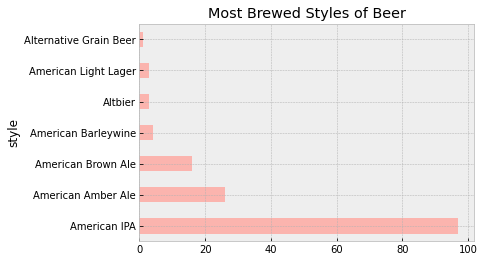

In [26]:
#create a plot of the most brewed style

top_style_plt=df2.groupby('style')['name'].count().nlargest(10).plot(kind='barh',  \
                title="Most Brewed Styles of Beer",  \
                x= 'style',
                cmap='Pastel1',)

In [27]:
#strongest beer style

tops(df2, 'style', 'abv').head(10)

,abv
style,
American Barleywine,11.24
American IPA,9.16
American Brown Ale,7.35
American Amber Ale,6.32
American Light Lager,5.34
Altbier,5.08
Alternative Grain Beer,4.25


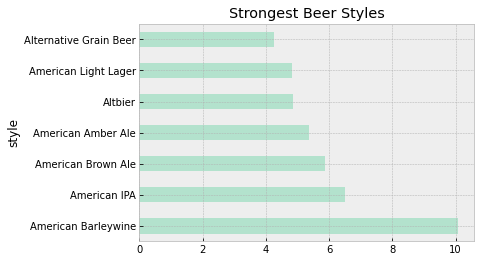

In [28]:
#use seaborn to plot top 10 beers by abv

top_style_plt=df2.groupby('style')['abv'].mean().nlargest(10).plot(kind='barh',  \
                title="Strongest Beer Styles",  \
                x= 'abv',
                cmap='Pastel2',);

In [29]:
#most bitter beer style

tops(df2, 'style', 'ibu').head()

,ibu
style,
American IPA,172.37
American Barleywine,135.13
American Amber Ale,78.37
Alternative Grain Beer,52.25
Altbier,44.68


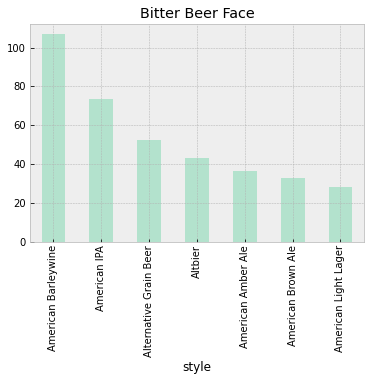

In [30]:
#plot the most bitter beers

top_style_plt=df2.groupby('style')['ibu'].mean().nlargest(10).plot(kind='bar',  \
                title="Bitter Beer Face",  \
                x= 'ibu',
                cmap='Pastel2',);

In [31]:
#darkest beer
tops(df2, 'style', 'color')

,color
style,
American IPA,39.35
American Brown Ale,29.83
American Barleywine,19.98
American Amber Ale,16.49
Altbier,14.68
Alternative Grain Beer,10.52
American Light Lager,5.49


In [32]:
#stout work

stout= df2[df2['style'].str.contains('Stout')]
stout.sort_values('color', ascending=False)

,name,style,style_id,size(l),og,fg,abv,ibu,color,boil_size,boil_time,boil_gravity,efficiency,mash_thickness,sugar_scale,brew_method,primary_temp


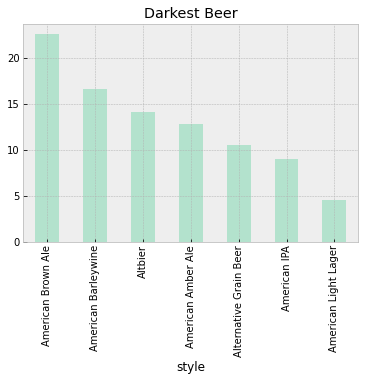

In [33]:
top_style_plt=df2.groupby('style')['color'].mean().nlargest(10).plot(kind='bar',  \
                title="Darkest Beer",  \
                x= 'color',
                cmap='Pastel2',);

In [34]:
mean('abv','ibu','color')

The average abv: 6.133817701453101
The average ibu: 44.55894319682958
The average color: 13.614914134742394


## Experiments and Hypothesis Testing

In [35]:
#create new df of numerics only
df3=df2.drop(['name','style', 'sugar_scale','brew_method'], axis=1)
df3.head(3)

,style_id,size(l),og,fg,abv,ibu,color,boil_size,boil_time,boil_gravity,efficiency,mash_thickness,primary_temp
15962,7,25.00,1.0430,1.00700,4.69,57.22,5.31,28.5,60,1.038,66.0,3.0,20.0
22310,4,23.00,13.4281,2.31609,5.95,29.27,11.99,28.0,60,11.100,75.0,3.0,20.0
12711,6,20.82,1.0600,1.01400,5.98,25.70,19.49,26.5,60,1.047,80.0,1.3,20.0


In [36]:
df3.shape

(150, 13)

In [37]:
df3.columns

Index(['style_id', 'size(l)', 'og', 'fg', 'abv', 'ibu', 'color', 'boil_size',
       'boil_time', 'boil_gravity', 'efficiency', 'mash_thickness',
       'primary_temp'],
      dtype='object')

In [38]:
df3.shape

(150, 13)

In [39]:
#the means of my features
mean('abv','ibu','color')

The average abv: 6.133817701453101
The average ibu: 44.55894319682958
The average color: 13.614914134742394


In [40]:
X=df3.iloc[:,1:13] #independent columns
y= df3.iloc[:,0] #target column
X

,size(l),og,fg,abv,ibu,color,boil_size,boil_time,boil_gravity,efficiency,mash_thickness,primary_temp
15962,25.00,1.0430,1.00700,4.69,57.22,5.31,28.50,60,1.038,66.0,3.00,20.00
22310,23.00,13.4281,2.31609,5.95,29.27,11.99,28.00,60,11.100,75.0,3.00,20.00
12711,20.82,1.0600,1.01400,5.98,25.70,19.49,26.50,60,1.047,80.0,1.30,20.00
63708,30.00,1.0610,1.01600,5.98,68.86,9.10,39.00,60,1.047,65.0,3.00,19.00
65883,30.00,1.0670,1.01600,7.08,71.23,12.11,39.00,60,1.052,65.0,3.00,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13128,20.82,1.0560,1.01500,5.31,41.22,26.73,28.39,60,1.041,73.0,1.50,18.89
54381,55.00,1.0650,1.01100,7.14,74.05,9.36,70.00,90,1.051,85.0,3.00,19.00
26057,18.93,1.0700,1.01900,6.69,59.16,7.89,25.55,60,1.052,70.0,1.25,20.00
40611,20.82,1.0650,1.01500,6.55,63.01,9.63,26.50,60,1.051,70.0,1.50,22.22


In [41]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class

[0.04216529 0.06353184 0.05476869 0.12923683 0.21342884 0.19054396
 0.04474614 0.03798864 0.08478728 0.03494833 0.04463652 0.05921762]


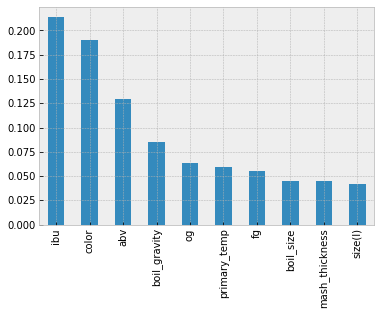

In [42]:
feat_importances= pd.Series(model.feature_importances_,
                           index=X.columns)
feat_importances.nlargest(10).plot(kind='bar');

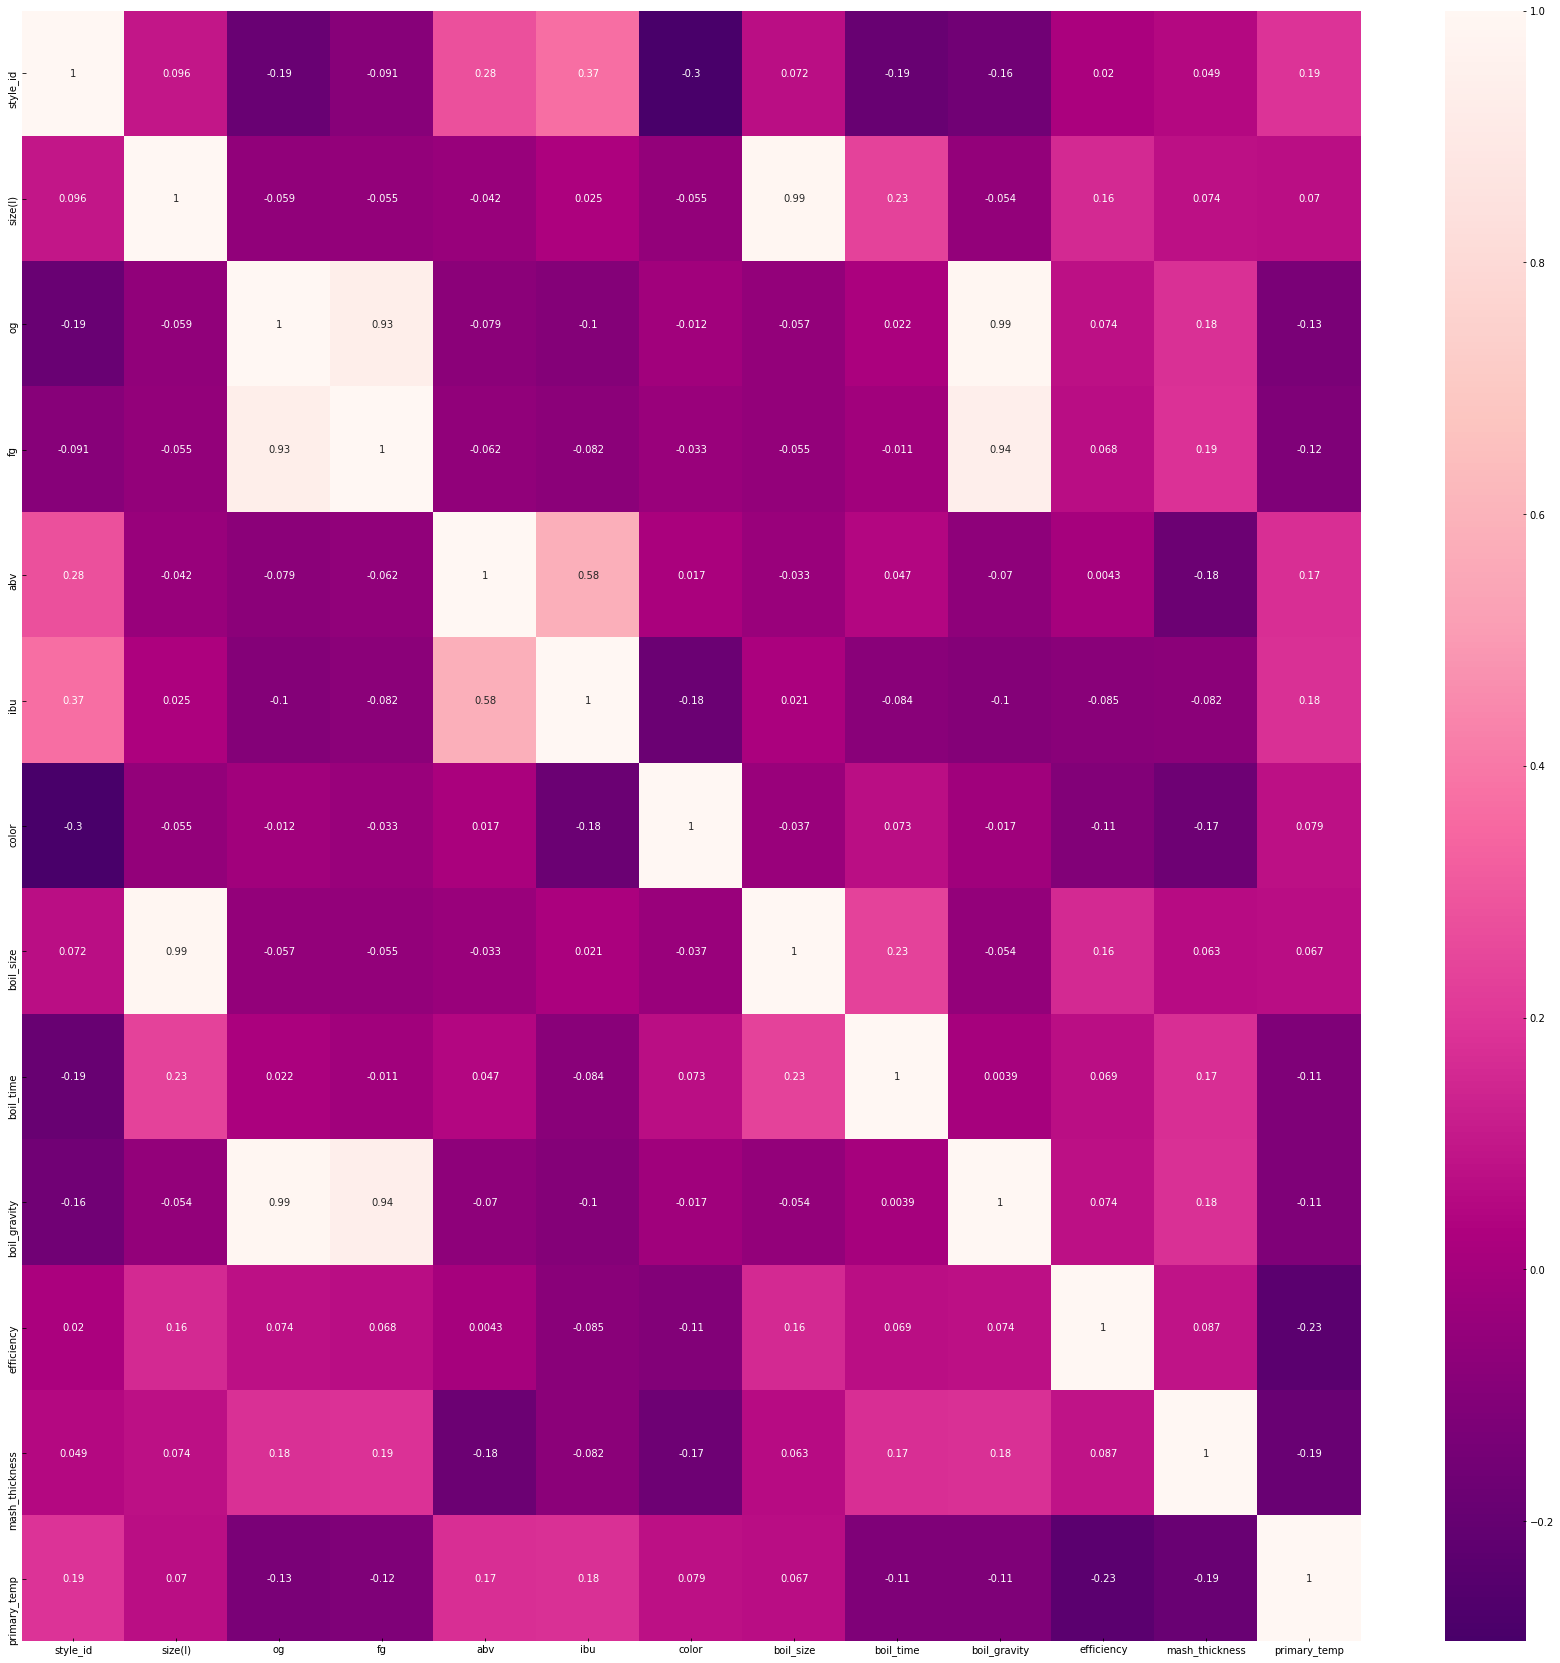

In [43]:
#use correlation matrix

corrmat= df3.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(30,30))

g= sns.heatmap(df3[top_corr_features].corr(), annot=True,
              cmap='RdPu_r')

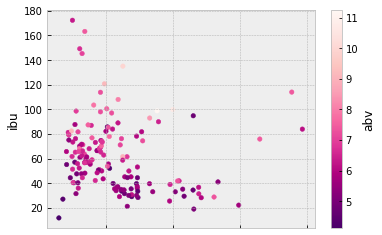

In [44]:
df2.plot(kind='scatter', x='color', y='ibu', c='abv', colormap='RdPu_r');

## Let's Plot!

In [45]:
#create feature matrix (X)
feature_cols= ['ibu','abv','color']
X=df3[feature_cols]

In [46]:
#download libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(150, 3)
(150,)


In [48]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=99)

In [49]:
#instantiate and fit StandardScaler
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [50]:
#create KNN Classifier (using K=1)
knn= KNeighborsClassifier(n_neighbors=1)

In [51]:
#train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [52]:
#predict the respone for the test dataset
y_pred= knn.predict(X_test)

In [53]:
#test the model on the testing set and check accuracy
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8947368421052632


Train Model k=10

In [54]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [55]:
#model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8157894736842105


In [56]:
most_freq_class= y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

7    73
4    22
6    12
9     2
5     2
1     1
Name: style_id, dtype: int64


7

In [57]:
#null accuracy
y_test.value_counts()[most_freq_class] / len(y_test)

0.631578947368421

## Tune the Model

In [58]:
#instatiate the model (using the value k=5)

knn= KNeighborsClassifier(n_neighbors=5)

#fit the model with the data
knn.fit(X,y)

#store the predicted response values
y_pred= knn.predict(X)

In [59]:
#calculate the predicted probabilites of class membership
#each row sums to one and contains the probabilities
knn.predict_proba(X)

array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.4, ..., 0.6, 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ]])

In [60]:
scores= []
for k in range(1,100):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred= knn.predict(X)
    score= float(sum(pred == y))/len(y)
    scores.append([k, score])

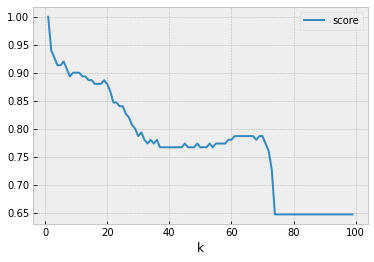

In [61]:
data = pd.DataFrame(scores, columns=['k', 'score'])
data.plot.line(x='k', y='score');

In [62]:
# search for the "best" K

k_range= list(range(1, 101))
training_error= []
testing_error= []

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred= knn.predict(X_train)
    training_accuracy= metrics.accuracy_score(y_train, y_pred)
    training_error.append(1 - training_accuracy)
    
    y_pred= knn.predict(X_test)
    testing_accuracy= metrics.accuracy_score(y_test, y_pred)
    testing_error.append(1 - testing_accuracy)

In [63]:
column_dict= {'K': k_range, 'Training Error': training_error, 
             'Testing Error': testing_error}

df_=pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df_.head()

,Training Error,Testing Error
K,,
100,0.348214,0.368421
99,0.348214,0.368421
98,0.348214,0.368421
97,0.348214,0.368421
96,0.348214,0.368421


In [64]:
df_.tail(10)

,Training Error,Testing Error
K,,
10,0.107143,0.184211
9,0.107143,0.184211
8,0.107143,0.184211
7,0.089286,0.184211
6,0.089286,0.184211
5,0.080357,0.184211
4,0.062500,0.131579
3,0.053571,0.131579
2,0.044643,0.131579


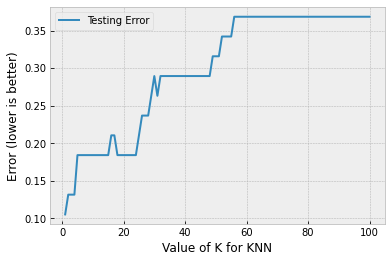

In [65]:
#plot the relationship between K(HIGH TO LOW) and TESTING ERROR
df_.plot(y='Testing Error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [66]:
#find the minimum testing error and the associated K Value
min(list(zip(testing_error, k_range)))

(0.10526315789473684, 1)

## Training Error Versus Testing Error

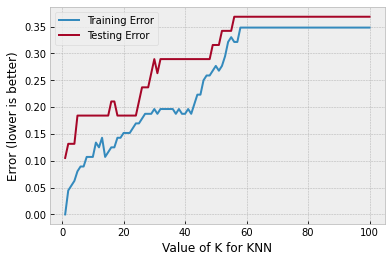

In [67]:
#plot the relationship between K (HIGH TO LOW) 
##TRAINING ERROR and TESTING ERROR

df_.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

## Making Predictions on Out of Sample Data

Given the statistics of an unknown beer, how do we predict the style?

In [68]:
#instantiate the model with best ingredients
knn= KNeighborsClassifier(n_neighbors=1)

#retrain the model with X and y
knn.fit(X,y)

#make a prediction for an out-of- sample observation
knn.predict(np.array([50, 8, 45]).reshape(1,-1))

array([6])

In [69]:
#predict probabilities
knn.predict_proba(np.array([2, 2, 3]).reshape(1, -1))

array([[0., 0., 0., 0., 0., 0., 1.]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [72]:
X_train

array([[ 4.99581234e-01,  1.12093118e+00,  3.13281978e+00],
       [-9.54641930e-01, -1.56293537e+00,  4.60738013e-01],
       [-4.68985622e-01, -7.08142260e-01, -7.72079987e-01],
       [ 3.01332455e+00,  4.04007920e-01, -8.10148002e-01],
       [ 7.75873338e-01, -8.31322412e-02,  4.06548613e+00],
       [ 4.72466853e-01, -7.81672850e-01, -1.04880517e+00],
       [ 6.84920037e-01,  2.38564092e-01, -1.06198256e+00],
       [-9.50180069e-01, -1.53536140e+00,  1.06412650e-01],
       [-8.95608089e-01, -9.10351383e-01,  1.44464977e+00],
       [-7.44591286e-01, -4.96741812e-01,  7.18429187e-01],
       [ 7.23703897e-01,  2.66507358e+00, -9.91703147e-01],
       [ 3.49589188e+00,  1.07497456e+00, -6.98872268e-01],
       [-1.09227315e+00, -1.25962169e+00,  1.47539701e+00],
       [ 1.44583879e+00,  1.49777545e+00, -5.04139733e-01],
       [-5.78816024e-01,  3.30477330e-01, -7.53045980e-01],
       [-1.19244436e-01,  2.47755416e-01, -5.80275762e-01],
       [-1.34042122e+00, -4.96741812e-01

In [73]:
X_test

array([[ 0.62451332,  0.65217366, -1.05319763],
       [-0.74321841, -1.43425684,  0.43291908],
       [-0.84343865, -0.05555827,  1.79458267],
       [-0.38832892, -0.1842368 , -0.32844121],
       [ 0.33586529,  0.77166087,  0.07712956],
       [-0.57950246, -1.27800434, -1.01659377],
       [-1.02088339, -0.82762947, -0.89214065],
       [ 0.40519573,  0.10069423, -0.46753587],
       [ 0.13336549,  0.3580513 , -0.90678219],
       [-0.14876136, -0.94711668, -0.70033642],
       [-1.17361629, -1.68242258, -1.17911491],
       [-0.06089704, -0.12908886, -0.67398164],
       [ 0.35542883, -0.2210021 , -0.76915168],
       [-0.15425288,  0.14665085, -0.6593401 ],
       [-0.08801142,  0.10988556,  0.12983912],
       [-1.02534525,  0.21099012,  1.79751098],
       [ 0.8369665 , -1.5721267 , -0.20545224],
       [ 0.41549233,  0.02716364, -0.96242006],
       [ 0.70002172,  0.79004352, -0.84821602],
       [-0.57538382, -1.06660389,  0.23525824],
       [-0.88737081, -1.1860911 ,  0.315

In [74]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
testing_accuracy= metrics.accuracy_score(y_test, y_pred)
testing_error= 1- testing_accuracy

print(testing_error)
print(testing_accuracy)

0.1842105263157895
0.8157894736842105


In [75]:
y_pred

array([7, 4, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 4, 4, 4,
       7, 7, 7, 7, 7, 7, 7, 4, 6, 7, 4, 7, 7, 6, 7, 7])

## Prediction with a Decision Tree

In [76]:
#load libraries

#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier()

In [77]:
#feature selection
feature_cols= ['ibu','abv','color']

X= df3[feature_cols] #features
y= df3.style_id # target

In [78]:
classes= df3.style_id

In [79]:
X.describe()

,ibu,abv,color
count,150.000000,150.000000,150.000000
mean,61.903333,6.256133,11.377800
std,28.401840,1.171846,6.627019
min,12.010000,4.130000,2.930000
25%,39.832500,5.477500,6.410000
50%,58.425000,6.170000,9.590000
75%,76.305000,6.887500,13.800000
max,172.370000,11.240000,39.350000


In [80]:
X['ibu'].value_counts()

66.60     2
40.53     2
163.30    1
51.57     1
68.86     1
         ..
55.29     1
39.15     1
99.97     1
35.35     1
39.75     1
Name: ibu, Length: 148, dtype: int64

In [81]:
X['abv'].value_counts()

4.87    3
6.36    3
6.60    3
6.35    2
5.98    2
       ..
7.34    1
4.69    1
7.31    1
6.78    1
6.61    1
Name: abv, Length: 119, dtype: int64

In [82]:
X['color'].value_counts()

8.65     3
14.65    2
9.15     2
14.55    2
13.82    2
        ..
23.86    1
7.30     1
7.08     1
26.73    1
12.50    1
Name: color, Length: 143, dtype: int64

In [83]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import tree

clf= DecisionTreeClassifier(max_depth=3, random_state=1) #max number of trees
clf.fit(X,y)

/Users/natashabedford/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [84]:
#create a Graphviz file
export_graphviz(clf,out_file='./Capstone/tree_beer.dot',
               feature_names=feature_cols)


FileNotFoundError: [Errno 2] No such file or directory: './Capstone/tree_beer.dot'

In [ ]:
#split dataset into training set and test set

#70% training
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=
                                                  0.3, random_state=1)

In [ ]:
#create Decision Tree classifier object
#fit a classification tree 

clf= DecisionTreeClassifier(max_depth=3, random_state=0)

#train Decision Tree Classifier
clf.fit(X,y);


#predict the response for test dataset
y_pred= clf.predict(X_test)

In [ ]:
#create a Graphviz file
#export_graphviz(treeclf, out_file='./assets/tree_beer.dot', 
               #feature_names=feature_cols)

In [ ]:
class_names=('abv','ibu','color')

In [ ]:
dot_data = StringIO()
export_graphviz(treeclf, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True),feature_names = feature_cols ,class_names=classes))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('beer.png')
Image(graph.create_png())

   ## Optimize Decision Tree Performance

In [ ]:
#create Decision Tree classifier object
clf= DecisionTreeClassifier(criterion='entropy', max_depth=3)

#train the Classifier
clf= clf.fit(X_train, y_train)

#predict the response
y_pred= clf.predict(X_test)

#model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('beer.png')
Image(graph.create_png())

In [ ]:
#compute the feature importance (the Gini index at each node)
pd.DataFrame({'feature': feature_cols, 
              'importance': clf.feature_importances_}).sort_values(
    'importance',ascending=False)

In [ ]:
clf.score(X,y)